In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

visa_df=pd.read_csv('Visadataset.csv')

cat=visa_df.select_dtypes(include='object').columns
num=visa_df.select_dtypes(exclude='object').columns

In [ ]:
- we have two types of scaling

   - z score (Standardization)

   - min max scr (normalization) 

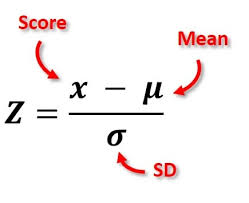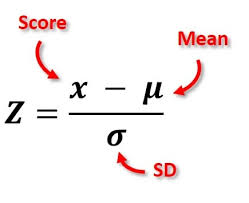

**Z score**

In [ ]:
# step-1: take the prevailing wage data 
# step-2: calculate mean of wage 
# step-3: calculate sd of wage
# step-4: Nr:step1-step2   Nr == means ==> numerator 
# step-5: z=step4/step3

In [2]:
wage_data=visa_df['prevailing_wage']
wage_mean=wage_data.mean()
wage_sd=wage_data.std()
nr=wage_data-wage_mean
wage_z=nr/wage_sd
visa_df['prevailing_wage_z']=wage_z


In [3]:
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,prevailing_wage_z
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,-1.398510
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,0.169832
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,0.919060
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,0.169991
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,1.428576
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified,0.049923
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified,3.876083
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified,1.360253
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified,0.221504


(array([6038., 5504., 5681., 4551., 2334.,  624.,  373.,  240.,  114.,
          21.]),
 array([-1.4096819 , -0.80530353, -0.20092515,  0.40345322,  1.0078316 ,
         1.61220997,  2.21658834,  2.82096672,  3.42534509,  4.02972346,
         4.63410184]),
 <BarContainer object of 10 artists>)

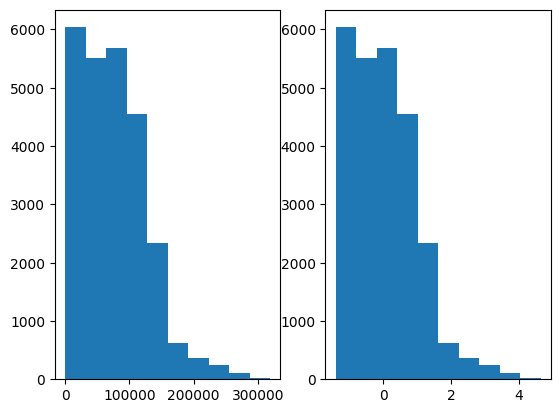

In [4]:
plt.subplot(1,2,1).hist(wage_data)
plt.subplot(1,2,2).hist(wage_z)

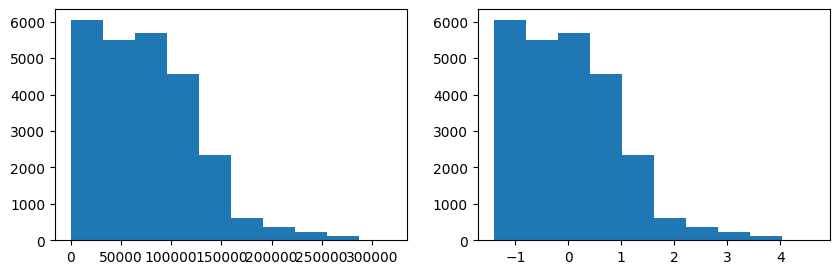

In [5]:
# histogram will not change
# only data values scaled down
# but the meaning of the data will not change

plt.figure(figsize=(10,3))
plt.subplot(1,2,1).hist(wage_data)
plt.subplot(1,2,2).hist(wage_z)
plt.show()

## two data set is available
## wage_data    maximum value, the id of both must be same and min also same 
## wage_data_z  maximum value, the id of both must be same and min also same 

In [6]:
wage_data.idxmax()

21077

In [7]:
wage_data.idxmax(),wage_z.idxmax()

(21077, 21077)

In [8]:
wage_z.idxmin(),wage_z.idxmin()

(20575, 20575)

- id=21077 has maximum value in both data

- id=20575 has minimum value in both data 

In [9]:
visa_df.iloc[[21077,20575]]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,prevailing_wage_z
21077,EZYV21078,Asia,High School,N,N,442,2006,Midwest,319210.2700,Year,Y,Denied,4.634102
20575,EZYV20576,North America,Master's,N,N,1552,2004,Northeast,2.1367,Hour,Y,Certified,-1.409682


In [10]:
visa_df.iloc[[21077,20575]][['prevailing_wage','prevailing_wage_z']] # instead of taking all data, we are taking two columns

,prevailing_wage,prevailing_wage_z
21077,319210.2700,4.634102
20575,2.1367,-1.409682


In [11]:
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,prevailing_wage_z
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,-1.398510
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,0.169832
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,0.919060
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,0.169991
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,1.428576
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified,0.049923
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified,3.876083
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified,1.360253
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified,0.221504


**standardization** # using package

- sklearn

    - preprocesing

        - StandardScalar

- import module

- save module

- apply fit transform



In [15]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform()   # you will get error, need to allpy values 


TypeError: TransformerMixin.fit_transform() missing 1 required positional argument: 'X'

In [17]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
wage_data=visa_df[['prevailing_wage']] # to convert series to data frame need two square brackets
sc.fit_transform(wage_data) 

array([[-1.39853722],
       [ 0.1698353 ],
       [ 0.91907852],
       ...,
       [ 1.36027953],
       [ 0.22150859],
       [-0.06776315]])

In [18]:
# give a variant to sc.fit_transform(wage_data)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
wage_data=visa_df[['prevailing_wage']] # to convert series to data frame need two square brackets
wage_data_ss=sc.fit_transform(wage_data)
visa_df['wage_data_ss']=wage_data_ss

In [19]:
visa_df[['prevailing_wage', 'prevailing_wage_z', 'wage_data_ss']] # method and package both are same (same values)

,prevailing_wage,prevailing_wage_z,wage_data_ss
0,592.2029,-1.398510,-1.398537
1,83425.6500,0.169832,0.169835
2,122996.8600,0.919060,0.919079
3,83434.0300,0.169991,0.169994
4,149907.3900,1.428576,1.428604
...,...,...,...
25475,77092.5700,0.049923,0.049924
25476,279174.7900,3.876083,3.876159
25477,146298.8500,1.360253,1.360280
25478,86154.7700,0.221504,0.221509


In [ ]:
# 1 dimensional and 2 dimensional will get in FUTURE

In [ ]:
**Normalization**

<img src="https://cdn.educba.com/academy/wp-content/uploads/2019/05/Normalization-Formula.jpg" jsaction="" class="sFlh5c FyHeAf iPVvYb" style="max-width: 1024px; height: 245px; margin: 13px 0px; width: 476px;" alt="Normalization Formula | Calculator (Examples With Excel Template)" jsname="kn3ccd">

In [ ]:
# do in two ways
# 1) without package 
# 2) with package 

In [ ]:
# with package 
- sklearn

    - preprocesing

        - MinMaxScalar

- import module

- save module

- apply fit transform

In [ ]:
wage_data=visa_df['prevailing_wage']
wage_mean=wage_data.mean()
dn=wage_sd=wage_data.std()
nr=wage_data-wage_mean
wage_new=nr/wage_sd
visa_df['prevailing_wage_z']=wage_z

In [ ]:
visa_df

In [3]:
wage_data=visa_df['prevailing_wage']
wage_min=wage_data.min()
wage_max=wage_data.max()
dn=wage_max-wage_min
nr=wage_data-wage_min
wage_new=nr/dn
visa_df['prevailing_wage_new']=wage_new

In [4]:
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,prevailing_wage_new
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,0.001849
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,0.261345
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,0.385312
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,0.261371
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,0.469616
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified,0.241505
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified,0.874579
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified,0.458311
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified,0.269895


In [6]:
wage_data.idxmax(), wage_new.idxmax()

(21077, 21077)

In [7]:
wage_new.idxmin(),wage_new.idxmin()

(20575, 20575)

In [8]:
visa_df.iloc[[21077,20575]]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,prevailing_wage_new
21077,EZYV21078,Asia,High School,N,N,442,2006,Midwest,319210.2700,Year,Y,Denied,1.0
20575,EZYV20576,North America,Master's,N,N,1552,2004,Northeast,2.1367,Hour,Y,Certified,0.0


In [9]:
visa_df.iloc[[21077,20575]][['prevailing_wage','prevailing_wage_new']]

,prevailing_wage,prevailing_wage_new
21077,319210.2700,1.0
20575,2.1367,0.0


In [10]:
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,prevailing_wage_new
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,0.001849
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,0.261345
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,0.385312
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,0.261371
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,0.469616
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified,0.241505
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified,0.874579
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified,0.458311
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified,0.269895


In [11]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
sc.fit_transform()

TypeError: TransformerMixin.fit_transform() missing 1 required positional argument: 'X'

In [12]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
wage_data=visa_df[['prevailing_wage']] # to convert series to data frame need two square brackets
sc.fit_transform(wage_data)

array([[0.00184853],
       [0.2613452 ],
       [0.385312  ],
       ...,
       [0.45831136],
       [0.26989486],
       [0.22203311]])

In [13]:
# give a variant to sc.fit_transform(wage_data)
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
wage_data=visa_df[['prevailing_wage']] # to convert series to data frame need two square brackets
wage_data_mm=sc.fit_transform(wage_data)
visa_df['wage_data_mm']=wage_data_mm

In [14]:
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,prevailing_wage_new,wage_data_mm
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,0.001849,0.001849
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,0.261345,0.261345
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,0.385312,0.385312
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,0.261371,0.261371
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,0.469616,0.469616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified,0.241505,0.241505
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified,0.874579,0.874579
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified,0.458311,0.458311
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified,0.269895,0.269895


In [15]:
visa_df[['prevailing_wage', 'prevailing_wage_new', 'wage_data_mm']] # method and package both are same

,prevailing_wage,prevailing_wage_new,wage_data_mm
0,592.2029,0.001849,0.001849
1,83425.6500,0.261345,0.261345
2,122996.8600,0.385312,0.385312
3,83434.0300,0.261371,0.261371
4,149907.3900,0.469616,0.469616
...,...,...,...
25475,77092.5700,0.241505,0.241505
25476,279174.7900,0.874579,0.874579
25477,146298.8500,0.458311,0.458311
25478,86154.7700,0.269895,0.269895


(array([6038., 5504., 5681., 4551., 2334.,  624.,  373.,  240.,  114.,
          21.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

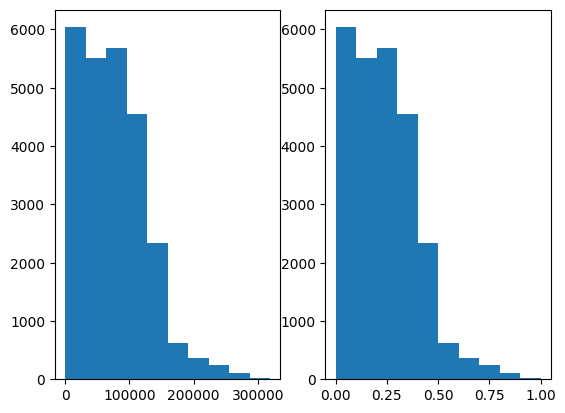

In [16]:
plt.subplot(1,2,1).hist(wage_data)
plt.subplot(1,2,2).hist(wage_new)

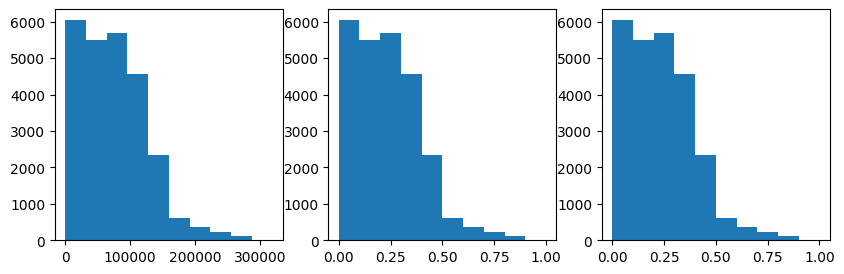

In [29]:

plt.figure(figsize=(10,3))

plt.subplot(1,3,1).hist(wage_data)
plt.subplot(1,3,2).hist(wage_new)
plt.subplot(1,3,3).hist(wage_data_mm)
plt.show()